In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors
from matplotlib.ticker import FuncFormatter
from matplotlib import font_manager
for file in font_manager.findSystemFonts([r'C:\Users\crino\Downloads\Lato']):
    font_manager.fontManager.addfont(path=file)
plt.rcParams['font.family'] = 'Lato'

In [52]:
vv = [0,1,5,3]
print(sorted(vv))

[0, 1, 3, 5]


In [53]:
def act_thresh(eps, α, u):
    if u == 0:
        return eps
    elif u == 1:
        return 1
    
    α1 = 1 - α
    x = (u * (1 - np.power(eps, α1)) + np.power(eps, α1)) ** (1 / α1)
    return x

def ab_mask_thresh(mu, eps, α, m, r_s, r_i, α_m):
    t_r_s = act_thresh(eps, α, 1_r_s)
    t_r_i = act_thresh(eps, α, 1-r_i)
    n_rev_r_s = (1-t_r_s**(1-α))/(1 - eps**(1-α))
    n_rev_r_i = (1-t_r_i**(1-α))/(1 - eps**(1-α))
    
    mean_a = (1 - α)*(1- eps**(2-α))/((2-α)* (1-eps**(1-α)))
    mean_a2 = (1 - α)*(1- eps**(3-α))/((3-α)* (1-eps**(1-α)))
    mean_a_s_rev = (1 - α)*(1 - t_r_s**(2-α))/((2-α)* (1-eps**(1-α)))
    mean_a_i_rev = (1 - α)*(1 - t_r_i**(2-α))/((2-α)* (1-eps**(1-α)))

    mean2_a_s_rev = (1 - α)*(1 - t_r_s**(3-α))/((3-α)* (1-eps**(1-α)))
    mean2_a_i_rev = (1 - α)*(1 - t_r_i**(3-α))/((3-α)* (1-eps**(1-α)))

    n_rev = sorted([n_rev_r_i, n_rev_r_s]) #il più piccolo corrisponde alla soglia maggiore
    m_a = sorted([mean_a_i_rev, mean_a_s_rev])#più piccolo soglia minore
    m2_a = sorted([mean2_a_i_rev, mean2_a_s_rev])#più piccolo soglia minore

    f_rev_n = 1 + (α_m - 1) * n_rev[1] + α_m *(α_m -1)* n_rev[0]
    f_rev_a = mean_a + (α_m - 1) * m_a[0] + α_m *(α_m -1)* m_a[1]
    f_rev_a2 = mean_a2 + (α_m - 1)* m2_a[0] + α_m *(α_m -1)* m2_a[1]

    λ_t = mu* (m*(f_rev_a + np.sqrt(f_rev_n * f_rev_a2)))**(-1)
    return λ_t, mean_a

def two_significant_digits(x, pos):
    return "{:.2f}".format(x)

In [119]:
for s in np.linspace(0,1,15):
    print(act_thresh(0.001, 2.1, s))
    

0.001
0.0010696546468190436
0.001150344022194217
0.0012449731714695045
0.0013575771720103172
0.001493934208814955
0.0016626288113134968
0.0018770066301113065
0.00215903958314658
0.0025477175938505895
0.003119700728970056
0.004050075373681458
0.00584905190158849
0.010948901345882542
1


In [54]:
function ab_mask_thresh(mu, eps, α, m, r_s, r_i, α_m)
    t_r_s = act_thresh(eps, α, 1 - r_s)
    t_r_i = act_thresh(eps, α, 1 - r_i)
    n_rev_r_s = (1-t_r_s^(1-α))/(1 - eps^(1-α))
    n_rev_r_i = (1-t_r_i^(1-α))/(1 - eps^(1-α))
    mean_a = (1 - α)*(1- eps^(2-α))/((2-α)* (1-eps^(1-α)))
    mean_a2 = (1 - α)*(1- eps^(3-α))/((3-α)* (1-eps^(1-α)))
    mean_a_s_rev = (1 - α)*(1 - t_r_s^(2-α))/((2-α)* (1-eps^(1-α)))
    mean_a_i_rev = (1 - α)*(1 - t_r_i^(2-α))/((2-α)* (1-eps^(1-α)))
    mean2_a_s_rev = (1 - α)*(1 - t_r_s^(3-α))/((3-α)* (1-eps^(1-α)))
    mean2_a_i_rev = (1 - α)*(1 - t_r_i^(3-α))/((3-α)* (1-eps^(1-α)))
    
    n_rev = sort([n_rev_r_i, n_rev_r_s])
    m_a = sort([mean_a_i_rev, mean_a_s_rev])
    m2_a = sort([mean2_a_i_rev, mean2_a_s_rev])

    f_rev_n = 1 + α_m * n_rev[2] + α_m *(α_m -1)* n_rev[1]
    f_rev_a = mean_a + α_m * m_a[1] + α_m *(α_m -1)* m_a[2]
    f_rev_a2 = mean_a2 + α_m * m2_a[1] + α_m *(α_m -1)* m2_a[2]

    λ_t = mu* (m*(f_rev_a + sqrt(f_rev_n * f_rev_a2)))^(-1)
    return λ_t, mean_a
end



SyntaxError: invalid syntax (Temp/ipykernel_8268/2650919401.py, line 1)

In [130]:

def ab_mask_thresh_buu(mu, eps, α, m, r_s, r_i, α_m):
    t_r_s = act_thresh(eps, α, r_s)
    t_r_i = act_thresh(eps, α, r_i)
    n_r_s = (t_r_s**(1-α)- eps**(1-α))/(1 - eps**(1-α))
    n_r_i = (t_r_i**(1-α)- eps**(1-α))/(1 - eps**(1-α))
    
    mean_a = (1 - α)*(1- eps**(2-α))/((2-α)* (1-eps**(1-α)))
    mean_a2 = (1 - α)*(1- eps**(3-α))/((3-α)* (1-eps**(1-α)))
    mean_a_s = (1 - α)*(t_r_s**(2-α)- eps**(2-α))/((2-α)* (1-eps**(1-α)))
    mean_a_i = (1 - α)*(t_r_i**(2-α)- eps**(2-α))/((2-α)* (1-eps**(1-α)))

    mean2_a_s = (1 - α)*(t_r_s**(3-α)- eps**(3-α))/((3-α)* (1-eps**(1-α)))
    mean2_a_i = (1 - α)*(t_r_i**(3-α)- eps**(3-α))/((3-α)* (1-eps**(1-α)))

    n_rev = sorted([n_r_i, n_r_s])#il più piccolo corrisponde alla soglia maggiore
    m_a = sorted([mean_a_i, mean_a_s])#il più piccolo corrisponde alla soglia minore
    m2_a = sorted([mean2_a_i, mean2_a_s])# il più piccolo corrisponde alla soglia minore

    f_rev_n = 1 + (α_m-1) * n_rev[1] + α_m *(α_m -1)* n_rev[0]
    f_rev_a = mean_a + (α_m-1)  * m_a[1] + α_m *(α_m -1)* m_a[0]
    f_rev_a2 = mean_a2 + (α_m-1) * m2_a[1] + α_m *(α_m -1)* m2_a[0]

    λ_t = mu* (m*(f_rev_a + np.sqrt(f_rev_n * f_rev_a2)))**(-1)
    return λ_t, mean_a


In [123]:
lam_t, mina = ab_mask_thresh_buu(0.01, 0.001, 2.1, 2, 0.8, 0.1, 0.9)
print(lam_t)
lam_tu, minau = ab_mask_thresh_buu(0.01, 0.001, 2.1, 2, 0.8, 0.1, 0.9)
print(lam_tu)

0.17229620064204423
0.17229620064204423


## Face mask effectiveness 10%

In [132]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = ab_mask_thresh_buu(0.01, 0.001, 2.1, 2, 0,0,0.9)
lam = 3 * lam_t

r_s = np.linspace(0.01, 1, 100)
r_i = np.linspace(0.01, 1, 100)
iErri = np.zeros((len(r_s), len(r_i)))

for i, r_sd  in enumerate(r_s):
    for j, r_id in enumerate(r_i):
        iErri[j, i] = lam / ab_mask_thresh_buu(0.01, 0.001, 2.1, 2, r_sd, r_id,0.9)[0]
print(iErri)
iErri_n = np.copy(iErri)
iErri_n[iErri_n<1] = np.nan

[[2.99747328 2.99614158 2.99480829 ... 2.8374396  2.82752569 2.69880338]
 [2.99614158 2.99494252 2.99360868 ... 2.83618583 2.82627333 2.69760535]
 [2.99480829 2.99360868 2.99240769 ... 2.83493061 2.82501951 2.69640588]
 ...
 [2.8374396  2.83618583 2.83493061 ... 2.68814669 2.67836369 2.55482273]
 [2.82752569 2.82627333 2.82501951 ... 2.67836369 2.66955646 2.54589896]
 [2.69880338 2.69760535 2.69640588 ... 2.55482273 2.54589896 2.43      ]]


In [133]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = ab_mask_thresh_buu(0.01, 0.001, 2.1, 2, 0,0,1)
lam = 1.5 * lam_t

r_s = np.linspace(0.01, 1, 100)
r_i = np.linspace(0.01, 1, 100)

iErri2 = np.zeros((len(r_s), len(r_i)))

for i, r_sd  in enumerate(r_s):
    for j, r_id in enumerate(r_i):
        iErri2[j, i] = lam /  ab_mask_thresh_buu(0.01, 0.001, 2.1, 2, r_sd, r_id, 0.9)[0]
print(iErri2)

[[1.49873664 1.49807079 1.49740414 ... 1.4187198  1.41376285 1.34940169]
 [1.49807079 1.49747126 1.49680434 ... 1.41809292 1.41313666 1.34880267]
 [1.49740414 1.49680434 1.49620385 ... 1.4174653  1.41250975 1.34820294]
 ...
 [1.4187198  1.41809292 1.4174653  ... 1.34407334 1.33918184 1.27741137]
 [1.41376285 1.41313666 1.41250975 ... 1.33918184 1.33477823 1.27294948]
 [1.34940169 1.34880267 1.34820294 ... 1.27741137 1.27294948 1.215     ]]


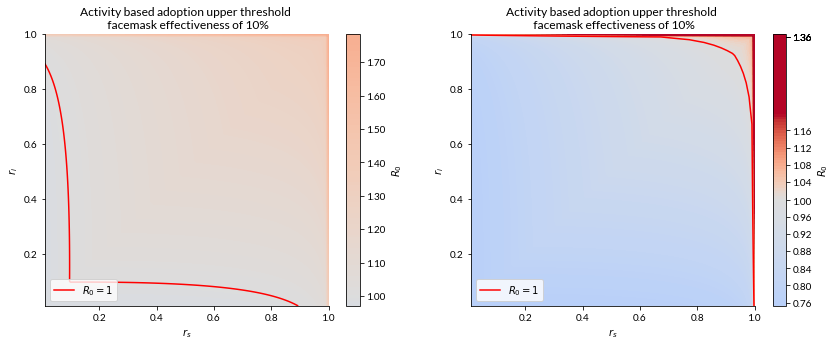

In [104]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))


contour_levels = np.linspace(iErri.min(), iErri.max(), 100)

midpoint = 1  # Center of the colormap
vmin, vmax = 0, 3  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

plot_surface = ax[0].contourf(r_s, r_i, iErri, cmap="coolwarm", vmin=0, vmax=3, levels = contour_levels, norm = norm)


# Plot contour lines
contour = ax[0].contour(r_s, r_i, iErri, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar = plt.colorbar(plot_surface,  ax=ax[0], label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.1))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.1))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()


# Add legend
ax[0].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[0].legend(loc="lower left")

# Label the axes
ax[0].set_xlabel(r"$r_s$")
ax[0].set_ylabel(r"$r_i$")
ax[0].set_title("Activity based adoption upper threshold \n facemask effectiveness of 10%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[0].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[0].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits


contour_levels2 = np.linspace(iErri2.min(), iErri2.max(), 100)

vmin2, vmax2 = 0, 1.2  # Min and max values of the colormap
norm2 = colors.TwoSlopeNorm(vmin=vmin2, vcenter=midpoint, vmax=vmax2)

plot_surface = ax[1].contourf(r_s, r_i, iErri2, cmap="coolwarm", vmin=0, vmax=1.2, levels = contour_levels2, norm = norm2)


# Plot contour lines
contour = ax[1].contour(r_s, r_i, iErri2, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar2 = plt.colorbar(plot_surface,  ax=ax[1], label=r"$R_0$")

cbar2.set_ticks(np.arange(0, vmax + 1, 0.04))  # Set ticks from 0 to vmax with step 1
cbar2.set_ticklabels(np.arange(0, vmax + 1, 0.04))

# Apply the custom formatter to the color bar ticks
cbar2.formatter = FuncFormatter(two_significant_digits)
cbar2.update_ticks()


# Add legend
ax[1].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[1].legend(loc="lower left")

# Label the axes
ax[1].set_xlabel(r"$r_s$")
ax[1].set_ylabel(r"$r_i$")
ax[1].set_title("Activity based adoption upper threshold \n facemask effectiveness of 10%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[1].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[1].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits
for axs in ax:    
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)
file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\ab_lmask_10_phase_space.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

# Show the plot
plt.show()

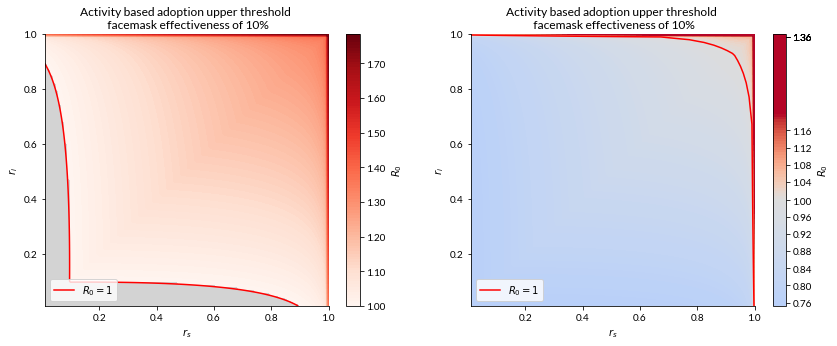

In [106]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))


contour_levels = np.linspace(1, np.nanmax(iErri_n), 100)
ax[0].set_facecolor("lightgrey")
vmax= np.nanmax(iErri_n)
plot_surface = ax[0].contourf(r_s, r_i, iErri_n, cmap="Reds", levels = contour_levels)

# Plot contour lines
contour = ax[0].contour(r_s, r_i, iErri, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar = plt.colorbar(plot_surface,  ax=ax[0], label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.1))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.1))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()


# Add legend
ax[0].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[0].legend(loc="lower left")

# Label the axes
ax[0].set_xlabel(r"$r_s$")
ax[0].set_ylabel(r"$r_i$")
ax[0].set_title("Activity based adoption upper threshold \n facemask effectiveness of 10%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[0].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[0].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits


contour_levels2 = np.linspace(iErri2.min(), iErri2.max(), 100)

vmin2, vmax2 = 0, 1.2  # Min and max values of the colormap
norm2 = colors.TwoSlopeNorm(vmin=vmin2, vcenter=midpoint, vmax=vmax2)

plot_surface = ax[1].contourf(r_s, r_i, iErri2, cmap="coolwarm", vmin=0, vmax=1.2, levels = contour_levels2, norm = norm2)


# Plot contour lines
contour = ax[1].contour(r_s, r_i, iErri2, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar2 = plt.colorbar(plot_surface,  ax=ax[1], label=r"$R_0$")

cbar2.set_ticks(np.arange(0, vmax + 1, 0.04))  # Set ticks from 0 to vmax with step 1
cbar2.set_ticklabels(np.arange(0, vmax + 1, 0.04))

# Apply the custom formatter to the color bar ticks
cbar2.formatter = FuncFormatter(two_significant_digits)
cbar2.update_ticks()


# Add legend
ax[1].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[1].legend(loc="lower left")

# Label the axes
ax[1].set_xlabel(r"$r_s$")
ax[1].set_ylabel(r"$r_i$")
ax[1].set_title("Activity based adoption upper threshold \n facemask effectiveness of 10%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[1].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[1].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits
for axs in ax:    
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)
file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\ab_lmask_10_phase_space.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

# Show the plot
plt.show()

## Face mask effectiveness 30%

In [134]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = lam_t, mina = ab_mask_thresh_buu(0.01, 0.001, 2.1, 2, 0,0,1)
lam = 1.75 * lam_t

r_s = np.linspace(0.01, 1, 100)
r_i = np.linspace(0.01, 1, 100)
sErri = np.zeros((len(r_s), len(r_i)))

for i, r_sd  in enumerate(r_s):
    for j, r_id in enumerate(r_i):
        sErri[j, i] = lam / ab_mask_thresh_buu(0.01, 0.001, 2.1, 2, r_sd, r_id, 0.7)[0]
sErri_n = np.copy(sErri)
sErri_n[sErri_n<1] = np.nan
print(sErri)

[[1.74604076 1.74370576 1.7413658  ... 1.45402537 1.43719091 1.22337052]
 [1.74370576 1.74206933 1.73972708 ... 1.45211877 1.43529003 1.2217376 ]
 [1.7413658  1.73972708 1.73808556 ... 1.45020832 1.4333853  1.22010122]
 ...
 [1.45402537 1.45211877 1.45020832 ... 1.22199764 1.20568036 1.01914971]
 [1.43719091 1.43529003 1.4333853  ... 1.20568036 1.19425478 1.00736158]
 [1.22337052 1.2217376  1.22010122 ... 1.01914971 1.00736158 0.8575    ]]


In [135]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = lam_t, mina = ab_mask_thresh_buu(0.01, 0.001, 2.1, 2, 0,0,1)
lam = 1.2 * lam_t

r_s = np.linspace(0.01, 1, 100)
r_i = np.linspace(0.01, 1, 100)
sErri2 = np.zeros((len(r_s), len(r_i)))

for i, r_sd  in enumerate(r_s):
    for j, r_id in enumerate(r_i):
        sErri2[j, i] = lam / ab_mask_thresh_buu(0.01, 0.001, 2.1, 2, r_sd, r_id, 0.7)[0]
print(sErri2)

[[1.1972851  1.19568395 1.19407941 ... 0.99704597 0.98550234 0.83888264]
 [1.19568395 1.19456183 1.19295571 ... 0.99573859 0.98419888 0.83776293]
 [1.19407941 1.19295571 1.1918301  ... 0.99442856 0.98289278 0.83664084]
 ...
 [0.99704597 0.99573859 0.99442856 ... 0.83794124 0.82675224 0.69884552]
 [0.98550234 0.98419888 0.98289278 ... 0.82675224 0.81891757 0.69076223]
 [0.83888264 0.83776293 0.83664084 ... 0.69884552 0.69076223 0.588     ]]


C:\Users\crino\AppData\Local\Temp/ipykernel_8268/4179572882.py:49: UserWarning: No contour levels were found within the data range.
  contour2 = ax[1].contour(r_s, r_i, sErri2, colors="red", levels=[1])


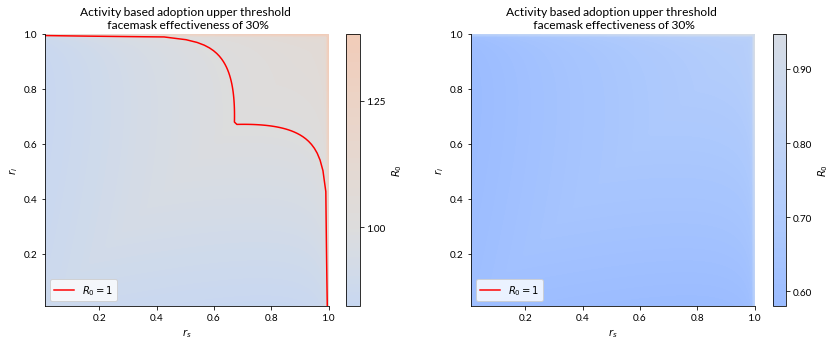

In [91]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))
contour_levels = np.linspace(sErri.min(), sErri.max(), 100)

midpoint = 1  # Center of the colormap
vmin, vmax = 0, 3  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

plot_surface = ax[0].contourf(r_s, r_i, sErri, cmap="coolwarm", vmin=0, vmax=3, levels = contour_levels, norm = norm)


# Plot contour lines
contour = ax[0].contour(r_s, r_i, sErri, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar = plt.colorbar(plot_surface,  ax=ax[0], label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.25))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.25))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()


# Add legend
ax[0].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[0].legend(loc="lower left")

# Label the axes
ax[0].set_xlabel(r"$r_s$")
ax[0].set_ylabel(r"$r_i$")
ax[0].set_title("Activity based adoption upper threshold \n facemask effectiveness of 30%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[0].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[0].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits


contour_levels2 = np.linspace(sErri2.min(), sErri2.max(), 100)

vmin2, vmax2 = 0, 1.2  # Min and max values of the colormap
norm2 = colors.TwoSlopeNorm(vmin=vmin2, vcenter=midpoint, vmax=vmax2)

plot_surface = ax[1].contourf(r_s, r_i, sErri2, cmap="coolwarm", vmin=0, vmax=1.2, levels = contour_levels2, norm = norm2)


# Plot contour lines
contour2 = ax[1].contour(r_s, r_i, sErri2, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar2 = plt.colorbar(plot_surface,  ax=ax[1], label=r"$R_0$")

cbar2.set_ticks(np.arange(0, vmax + 1, 0.1))  # Set ticks from 0 to vmax with step 1
cbar2.set_ticklabels(np.arange(0, vmax + 1, 0.1))

cbar2.formatter = FuncFormatter(two_significant_digits)
cbar2.update_ticks()

# Add legend
ax[1].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[1].legend(loc="lower left")

# Label the axes
ax[1].set_xlabel(r"$r_s$")
ax[1].set_ylabel(r"$r_i$")
ax[1].set_title("Activity based adoption upper threshold \n facemask effectiveness of 30%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[1].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[1].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits
for axs in ax:    
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)
file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\ab_lmask_30_phase_space.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

# Show the plot
plt.show()

C:\Users\crino\AppData\Local\Temp/ipykernel_8268/2512118802.py:45: UserWarning: No contour levels were found within the data range.
  contour2 = ax[1].contour(r_s, r_i, sErri2, colors="red", levels=[1])


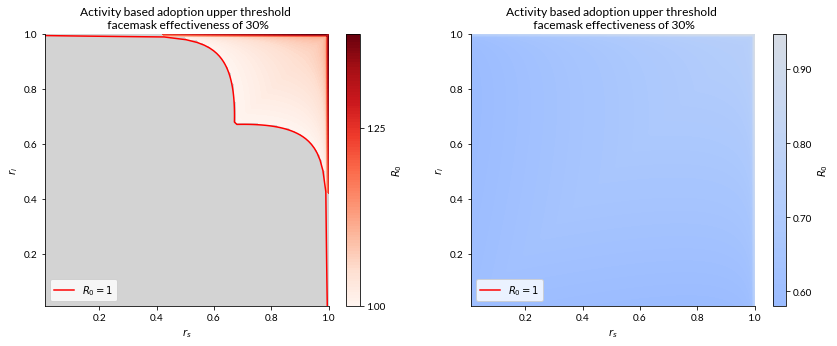

In [108]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))
contour_levels = np.linspace(1, np.nanmax(sErri_n), 100)
ax[0].set_facecolor("lightgrey")
vmax = np.nanmax(sErri_n)
plot_surface = ax[0].contourf(r_s, r_i, sErri_n, cmap="Reds", levels = contour_levels)

# Plot contour lines
contour = ax[0].contour(r_s, r_i, sErri, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar = plt.colorbar(plot_surface,  ax=ax[0], label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.25))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.25))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()


# Add legend
ax[0].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[0].legend(loc="lower left")

# Label the axes
ax[0].set_xlabel(r"$r_s$")
ax[0].set_ylabel(r"$r_i$")
ax[0].set_title("Activity based adoption upper threshold \n facemask effectiveness of 30%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[0].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[0].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits


contour_levels2 = np.linspace(sErri2.min(), sErri2.max(), 100)

vmin2, vmax2 = 0, 1.2  # Min and max values of the colormap
norm2 = colors.TwoSlopeNorm(vmin=vmin2, vcenter=midpoint, vmax=vmax2)

plot_surface = ax[1].contourf(r_s, r_i, sErri2, cmap="coolwarm", vmin=0, vmax=1.2, levels = contour_levels2, norm = norm2)


# Plot contour lines
contour2 = ax[1].contour(r_s, r_i, sErri2, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar2 = plt.colorbar(plot_surface,  ax=ax[1], label=r"$R_0$")

cbar2.set_ticks(np.arange(0, vmax + 1, 0.1))  # Set ticks from 0 to vmax with step 1
cbar2.set_ticklabels(np.arange(0, vmax + 1, 0.1))

cbar2.formatter = FuncFormatter(two_significant_digits)
cbar2.update_ticks()

# Add legend
ax[1].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[1].legend(loc="lower left")

# Label the axes
ax[1].set_xlabel(r"$r_s$")
ax[1].set_ylabel(r"$r_i$")
ax[1].set_title("Activity based adoption upper threshold \n facemask effectiveness of 30%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[1].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[1].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits
for axs in ax:    
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)
file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\ab_lmask_30_phase_space.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

# Show the plot
plt.show()

In [ ]:
contour_levels = np.linspace(1, np.nanmax(sErri_n), 100)
ax[0].set_facecolor("lightgrey")
vmax = np.nanmax(sErri_n)
plot_surface = ax[0].contourf(r_s, r_i, sErri_n, cmap="Reds", levels = contour_levels)

# Plot contour lines
contour = ax[0].contour(r_s, r_i, sErri, colors="red", levels=[1])

## Face mask effectiveness 30%

In [136]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = lam_t, mina = ab_mask_thresh_buu(0.01, 0.001, 2.1, 2, 0,0,1)
lam = 1.75 * lam_t
print(lam_t)
print(ab_mask_thresh_buu(0.01, 0.001, 2.1, 2, 0,0,0.5))
r_s = np.linspace(0.0, 1, 100)
r_i = np.linspace(0.0, 1, 100)
cErri = np.zeros((len(r_s), len(r_i)))

for i, r_sd  in enumerate(r_s):
    for j, r_id in enumerate(r_i):
        cErri[j, i] = lam / ab_mask_thresh_buu(0.01, 0.001, 2.1, 2, r_sd, r_id, 0.5)[0]
print(cErri)
cErri_n = np.copy(cErri)
cErri_n[cErri_n<1] = np.nan

0.1654468827603741
(0.1654468827603741, 0.005489691793543476)
[[1.75       1.74607922 1.74214642 ... 1.2342899  1.207055   0.875     ]
 [1.74607922 1.74411539 1.74017798 ... 1.23163509 1.20441018 0.87303961]
 [1.74214642 1.74017798 1.7382058  ... 1.22897264 1.20175767 0.87107321]
 ...
 [1.2342899  1.23163509 1.22897264 ... 0.90056149 0.8739115  0.61714495]
 [1.207055   1.20441018 1.20175767 ... 0.8739115  0.86058644 0.6035275 ]
 [0.875      0.87303961 0.87107321 ... 0.61714495 0.6035275  0.4375    ]]


In [137]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = lam_t, mina = ab_mask_thresh_buu(0.01, 0.001, 2.1, 2, 0,0,1)
lam = 1.2 * lam_t

r_s = np.linspace(0.01, 1, 100)
r_i = np.linspace(0.01, 1, 100)
cErri2 = np.zeros((len(r_s), len(r_i)))

for i, r_sd  in enumerate(r_s):
    for j, r_id in enumerate(r_i):
        cErri2[j, i] = lam / ab_mask_thresh_buu(0.01, 0.001, 2.1, 2, r_sd, r_id, 0.5)[0]
print(cErri2)

[[1.19600528 1.19333249 1.19065152 ... 0.84429431 0.82562415 0.5986692 ]
 [1.19333249 1.19199376 1.18930966 ... 0.84248696 0.82382376 0.59733435]
 [1.19065152 1.18930966 1.18796524 ... 0.84067443 0.82201816 0.59599543]
 ...
 [0.84429431 0.84248696 0.84067443 ... 0.61710643 0.59885661 0.42304826]
 [0.82562415 0.82382376 0.82201816 ... 0.59885661 0.58973167 0.41370969]
 [0.5986692  0.59733435 0.59599543 ... 0.42304826 0.41370969 0.3       ]]


C:\Users\crino\AppData\Local\Temp/ipykernel_8268/3573707750.py:55: UserWarning: No contour levels were found within the data range.
  contour2 = ax[1].contour(r_s, r_i, cErri2, colors="red", levels=[1])


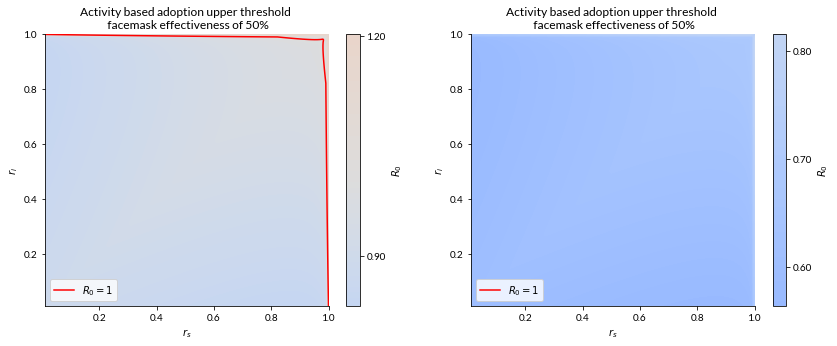

In [100]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))
contour_levels = np.linspace(cErri.min(), cErri.max(), 100)

midpoint = 1  # Center of the colormap
vmin, vmax = 0, 3  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

plot_surface = ax[0].contourf(r_s, r_i, cErri, cmap="coolwarm", vmin=0, vmax=3, levels = contour_levels, norm = norm)
for axs in ax:    
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)

midpoint = 1  # Center of the colormap
vmin, vmax = 0, 3  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

# Plot contour lines
contour = ax[0].contour(r_s, r_i, cErri, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar = plt.colorbar(plot_surface,ax=ax[0], label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.3))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.3))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()


# Add legend
ax[0].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[0].legend(loc="lower left")

# Label the axes
ax[0].set_xlabel(r"$r_s$")
ax[0].set_ylabel(r"$r_i$")
ax[0].set_title("Activity based adoption upper threshold \n facemask effectiveness of 50%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[0].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[0].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits


contour_levels2 = np.linspace(cErri2.min(), cErri2.max(), 100)

vmin2, vmax2 = 0, 1.2  # Min and max values of the colormap
norm2 = colors.TwoSlopeNorm(vmin=vmin2, vcenter=midpoint, vmax=vmax2)

plot_surface = ax[1].contourf(r_s, r_i, cErri2, cmap="coolwarm", vmin=0, vmax=1.2, levels = contour_levels2, norm = norm2)


# Plot contour lines
contour2 = ax[1].contour(r_s, r_i, cErri2, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar2 = plt.colorbar(plot_surface,  ax=ax[1], label=r"$R_0$")

cbar2.set_ticks(np.arange(0, vmax + 1, 0.1))  # Set ticks from 0 to vmax with step 1
cbar2.set_ticklabels(np.arange(0, vmax + 1, 0.1))

cbar2.formatter = FuncFormatter(two_significant_digits)
cbar2.update_ticks()

# Add legend
ax[1].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[1].legend(loc="lower left")

# Label the axes
ax[1].set_xlabel(r"$r_s$")
ax[1].set_ylabel(r"$r_i$")
ax[1].set_title("Activity based adoption upper threshold \n facemask effectiveness of 50%")
ax[1].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[1].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits
for axs in ax:    
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)
file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\ab_lmask_50_phase_space.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 
# Show the plot
plt.show()



In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))
contour_levels = np.linspace(cErri.min(), cErri.max(), 100)

midpoint = 1  # Center of the colormap
vmin, vmax = 0, 3  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

plot_surface = ax[0].contourf(r_s, r_i, cErri, cmap="coolwarm", vmin=0, vmax=3, levels = contour_levels, norm = norm)
for axs in ax:    
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)

midpoint = 1  # Center of the colormap
vmin, vmax = 0, 3  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

# Plot contour lines
contour = ax[0].contour(r_s, r_i, cErri, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar = plt.colorbar(plot_surface,ax=ax[0], label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.3))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.3))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()


# Add legend
ax[0].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[0].legend(loc="lower left")

# Label the axes
ax[0].set_xlabel(r"$r_s$")
ax[0].set_ylabel(r"$r_i$")
ax[0].set_title("Activity based adoption upper threshold \n facemask effectiveness of 50%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[0].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[0].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits


contour_levels2 = np.linspace(cErri2.min(), cErri2.max(), 100)

vmin2, vmax2 = 0, 1.2  # Min and max values of the colormap
norm2 = colors.TwoSlopeNorm(vmin=vmin2, vcenter=midpoint, vmax=vmax2)

plot_surface = ax[1].contourf(r_s, r_i, cErri2, cmap="coolwarm", vmin=0, vmax=1.2, levels = contour_levels2, norm = norm2)


# Plot contour lines
contour2 = ax[1].contour(r_s, r_i, cErri2, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar2 = plt.colorbar(plot_surface,  ax=ax[1], label=r"$R_0$")

cbar2.set_ticks(np.arange(0, vmax + 1, 0.1))  # Set ticks from 0 to vmax with step 1
cbar2.set_ticklabels(np.arange(0, vmax + 1, 0.1))

cbar2.formatter = FuncFormatter(two_significant_digits)
cbar2.update_ticks()

# Add legend
ax[1].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[1].legend(loc="lower left")

# Label the axes
ax[1].set_xlabel(r"$r_s$")
ax[1].set_ylabel(r"$r_i$")
ax[1].set_title("Activity based adoption upper threshold \n facemask effectiveness of 50%")
ax[1].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[1].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits
for axs in ax:    
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)
file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\ab_lmask_50_phase_space.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 
# Show the plot
plt.show()

